In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Preparing Companies DF

In [2]:
rounds_df = pd.read_csv("../raw/rounds.csv", encoding = 'ISO-8859-1').drop('Unnamed: 16', axis = 1).dropna()

In [3]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
#     'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
#     'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
#     'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
#     'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [4]:
companies_df = pd.read_csv("../raw/companies.csv", encoding = 'ISO-8859-1').dropna()
companies_df.rename(columns = lambda x: x.strip(), inplace = True)

companies_df['city'] = companies_df['city'].astype(str)
companies_df['market'] = companies_df['market'].apply(lambda x: x.strip())

companies_df['funding_total_usd'] = companies_df['funding_total_usd'].apply(lambda x: x.replace(',', '').strip())
companies_df = companies_df[companies_df['funding_total_usd'] != '-']

for col in ['funding_total_usd', 'founded_year', 'funding_rounds']:
    companies_df[col] = companies_df[col].astype(int)

In [5]:
companies_df

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06,2012-Q2,2012,2012-06-30,2012-06-30
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,|Health and Wellness|,Health and Wellness,1750000,operating,USA,NJ,Newark,Iselin,1,1984-01-01,1984-01,1984-Q1,1984,2011-03-02,2011-03-02
16,/organization/10-20-media,10-20 Media,http://www.10-20media.com,|E-Commerce|,E-Commerce,2050000,operating,USA,MD,Baltimore,Woodbine,4,2001-01-01,2001-01,2001-Q1,2001,2009-06-18,2011-12-28
17,/organization/1000-corks,1000 Corks,http://1000corks.com,|Search|,Search,40000,operating,USA,OR,"Portland, Oregon",Lake Oswego,1,2008-01-01,2008-01,2008-Q1,2008,2011-08-23,2011-08-23
20,/organization/1000memories,1000memories,http://1000memories.com,|Curated Web|,Curated Web,2535000,acquired,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010,2010-01-01,2011-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,13000000,operating,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-01,2014-Q1,2014,2014-10-14,2014-10-14
49426,/organization/zynga,Zynga,http://www.zynga.com,|Technology|Facebook Applications|Networking|G...,Technology,866550786,operating,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-07,2007-Q3,2007,2007-01-01,2011-02-18
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,25000000,operating,USA,MD,"Washington, D.C.",Gaithersburg,1,2008-01-01,2008-01,2008-Q1,2008,2010-09-09,2010-09-09
49429,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,|Biotechnology|,Biotechnology,34275015,operating,USA,MO,MO - Other,Fremont,4,1998-01-01,1998-01,1998-Q1,1998,2010-01-29,2014-03-26


In [6]:
companies_df['cityMap'] = companies_df['city']

In [7]:
# merge Cambridge, MA with Boston, MA
companies_df.loc[(companies_df.city == 'Cambridge') & (companies_df.state_code == 'MA'), 'cityMap'] = 'Boston'

In [8]:
# merge non-SF Bay Area Cities to Bay Area
BAcities = ['Santa Clara', 'Sunnyvale', 'Menlo Park', 'Redwood City', 'San Mateo', 'Fremont']
companies_df.loc[companies_df['city'].isin(BAcities), 'cityMap'] = 'Bay Area'

In [9]:
worldcities_df = pd.read_csv("../raw/worldcities.csv")
worldcities_df = worldcities_df[worldcities_df['country'] == 'United States'][['city', 'lat', 'lng', 'admin_name']]
worldcities_df.rename(columns={"admin_name": "state"}, inplace = True)
worldcities_df['city'] = worldcities_df['city'].astype(str)
worldcities_df['state_code'] = worldcities_df['state'].apply(lambda x: us_state_abbrev[x])

In [10]:
# Fudge locations of Bay Area cities for visual clarity on map
worldcities_df.loc[(worldcities_df['city'] == 'Palo Alto'), 'lat'] = 37
worldcities_df.loc[(worldcities_df['city'] == 'Mountain View'), 'lng'] = -121

In [11]:
# worldcities_df[worldcities_df['city'] == 'San Francisco']

In [12]:
# worldcities_df[worldcities_df['city'] == 'Palo Alto']

In [13]:
# worldcities_df[worldcities_df['city'] == 'Mountain View']

In [14]:
merge_df = companies_df.merge(worldcities_df, how = 'inner', left_on = ['cityMap', 'state_code'], right_on = ['city', 'state_code'])

for col in ['lat', 'lng']:
    merge_df[col] = merge_df[col].astype(float)
    
merge_df['cityState'] = merge_df['cityMap'] + ", " + merge_df['state']

In [15]:
merge_df['marketMode'] = (merge_df['cityState'].map(merge_df.groupby('cityState')['market'].agg(lambda x: x.value_counts().idxmax())))

In [16]:
merge_df.market = merge_df.market.apply(lambda x: 'Software' if 'Software' in x else x)

In [17]:
merge_df.market = merge_df.market.apply(lambda x: 'Health' if 'Health' in x else x)

In [18]:
# 2007-2014
merge_df = merge_df[merge_df['founded_month'] >= '2007']

In [19]:
merge_df.sort_values(by=['founded_at'], inplace=True)

In [20]:
merge_df.to_csv("../clean/companies_final.csv")

## Analysis into Top Industries

In [21]:
markets = pd.DataFrame(merge_df.groupby('market')['market'].count())
markets.rename(columns={'market': 'count'}, inplace=True)
markets = markets[markets['count'] > 100]
markets.sort_values('count', ascending=False, inplace=True)
markets.reset_index(inplace=True)
markets

,market,count
0,Software,1606
1,Biotechnology,681
2,Health,620
3,Mobile,513
4,Curated Web,457
5,E-Commerce,372
6,Advertising,286
7,Education,239
8,Games,233
9,Social Media,231


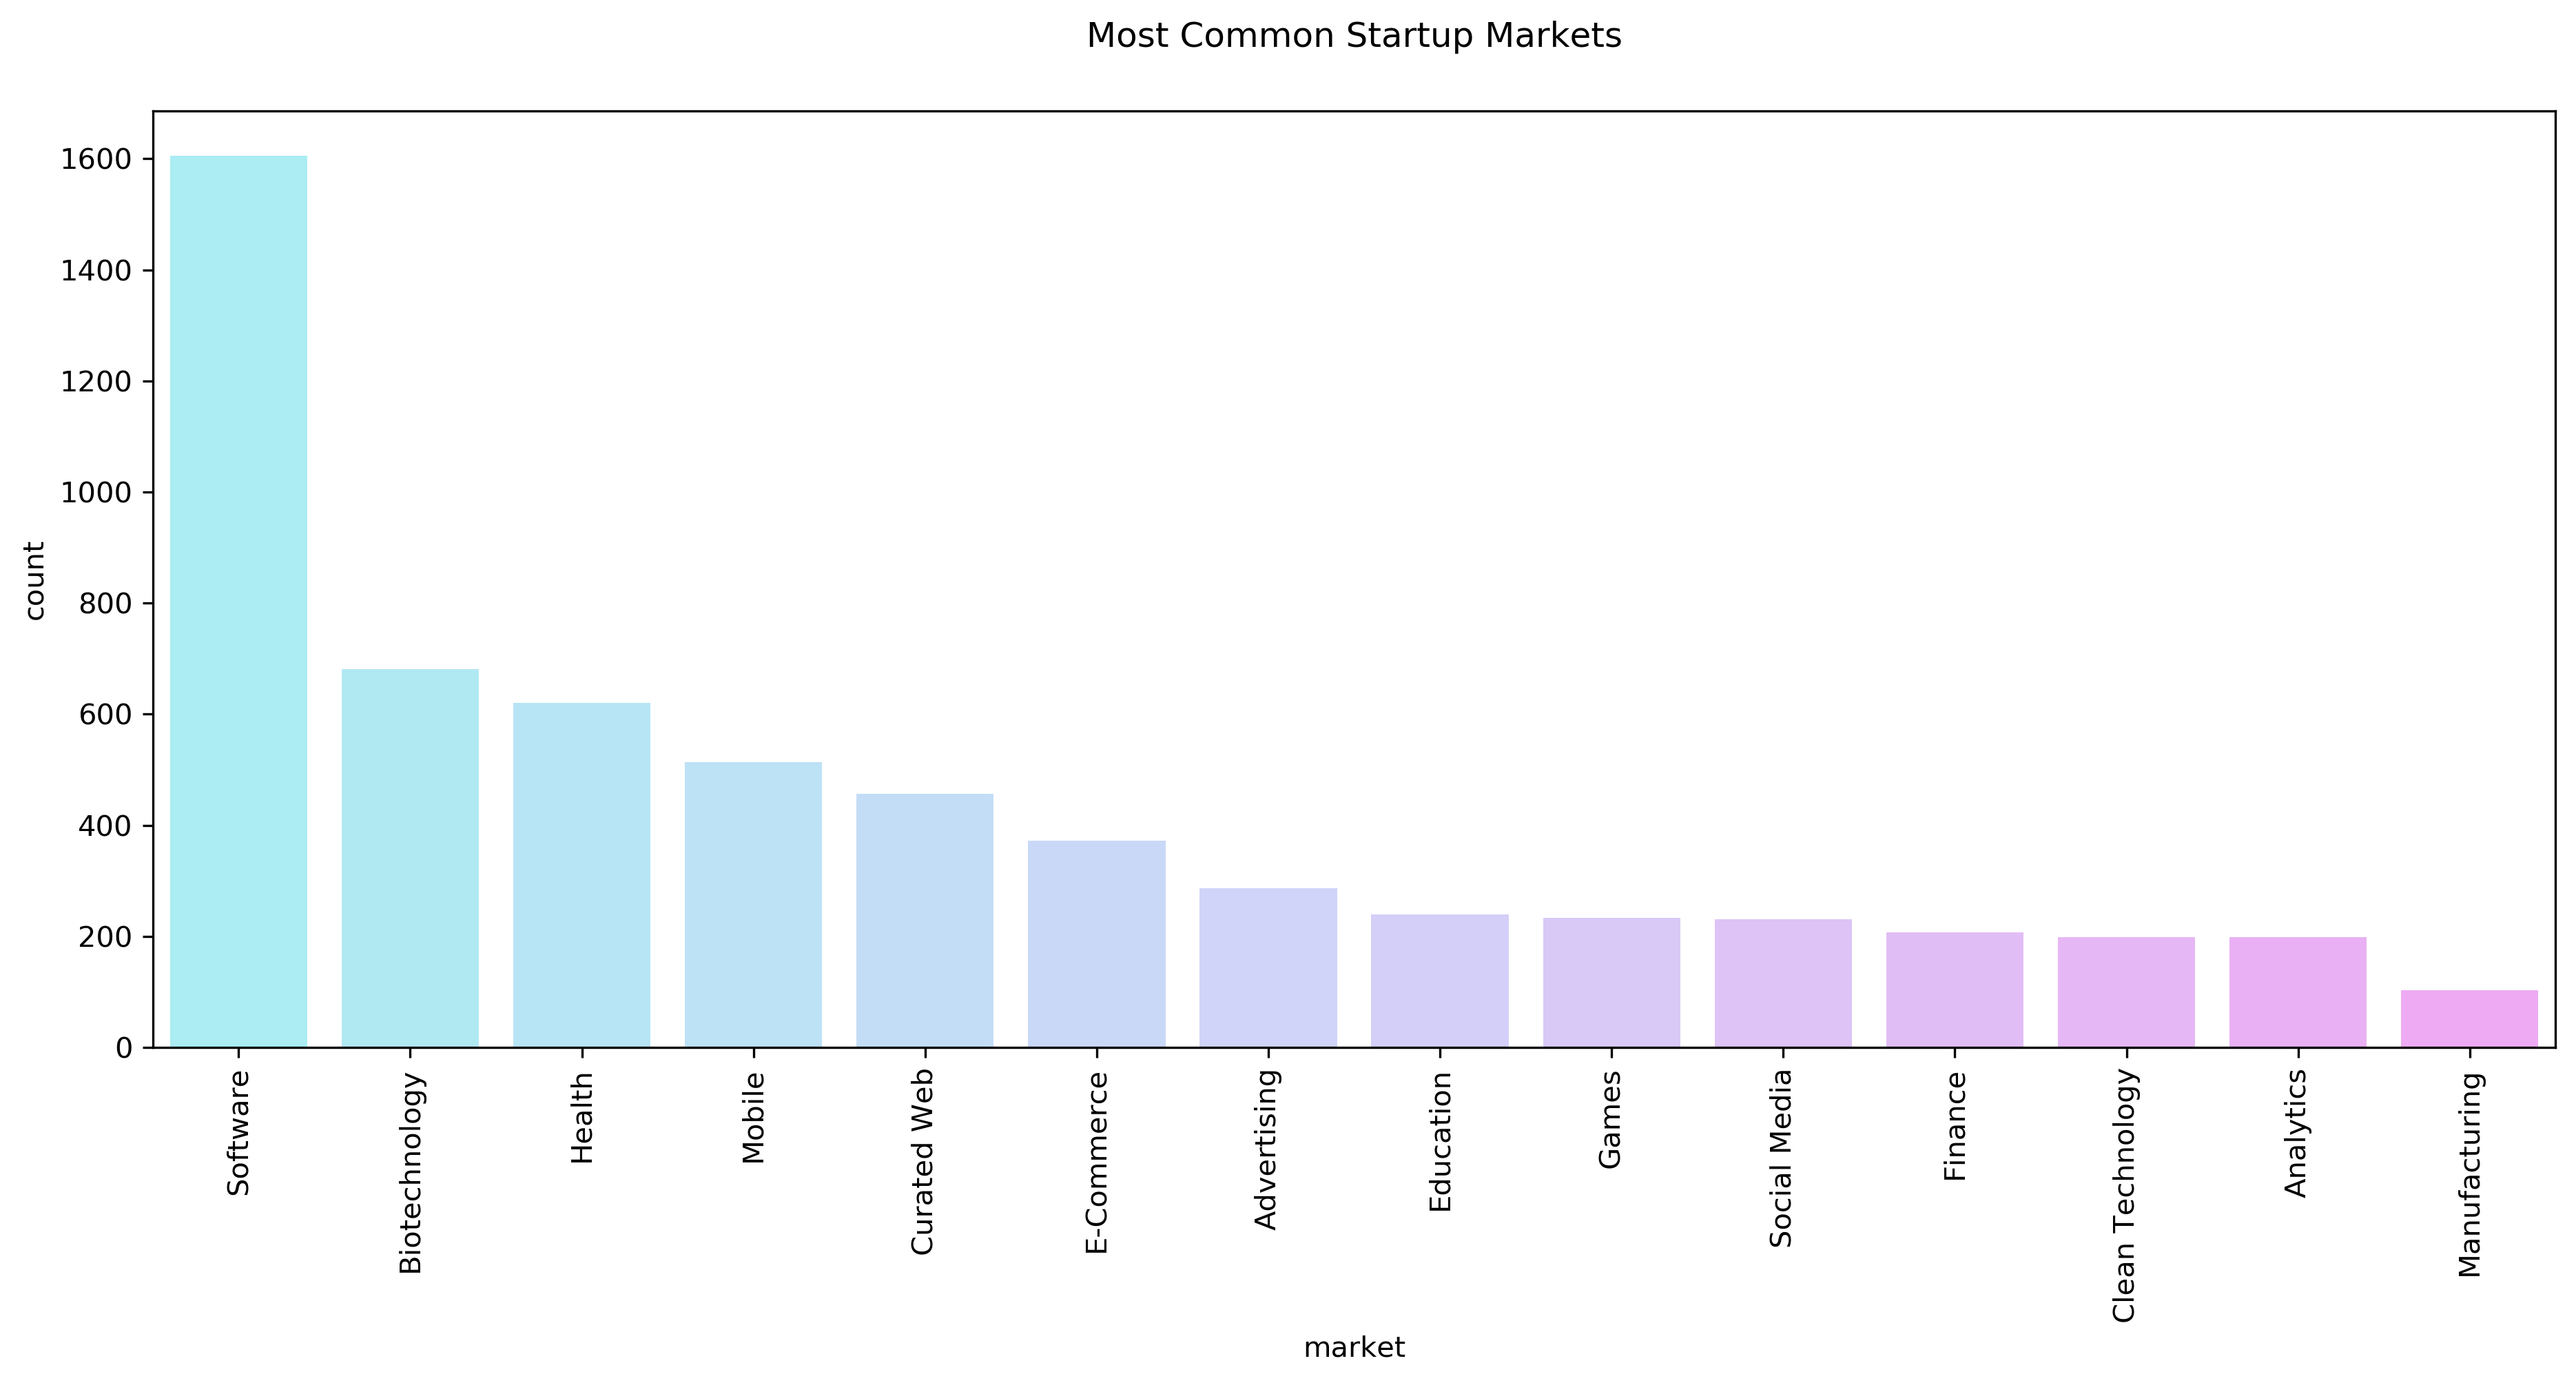

In [22]:
fig, ax = plt.subplots(1,1, figsize=(15,6), dpi=300)
sns.barplot(x='market', y='count', data=markets, ax=ax, palette='cool', alpha=.4)
plt.xticks(rotation=90)
plt.title('Most Common Startup Markets', y=1.05)
plt.show()

## Analysis for Acquirers

In [23]:
aquisitions_df = pd.read_csv("../raw/aquisitions.csv", encoding = 'ISO-8859-1').dropna()

/Users/jonathanhuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
aquisitions_df.rename(columns = lambda x: x.strip(), inplace = True)

aquisitions_df['acquirer_name'] = aquisitions_df['acquirer_name'].apply(lambda x: x.strip())

aquisitions_df['price_amount'] = aquisitions_df['price_amount'].apply(lambda x: x.replace(',', '').strip())

In [25]:
# aquisitions_df

In [26]:
aquisitions_df.loc[aquisitions_df['acquirer_name'] == 'Microsoft', 'acquirer_market'] = 'Software'
aquisitions_df.loc[aquisitions_df['acquirer_name'].isin(['Yahoo!', 'AOL', 'Google']), 'acquirer_market'] = 'Service Provider'
aquisitions_df.loc[aquisitions_df['acquirer_name'].isin(['Salesforce', 'Cisco']), 'acquirer_market'] = 'Enterprise Software'
aquisitions_df.loc[aquisitions_df['acquirer_name'] == 'Hewlett-Packard', 'acquirer_market'] = 'Hardware + Software'
aquisitions_df.loc[aquisitions_df['acquirer_name'] == 'Facebook', 'acquirer_market'] = 'Social Media'

In [27]:
# aquisitions_df[aquisitions_df['acquirer_name'] == 'Google']

In [28]:
aquisitions_df.to_csv("../clean/acquisitions_final.csv")

In [29]:
bigCompanies = pd.DataFrame(aquisitions_df.groupby('acquirer_name')['acquirer_name'].count())
bigCompanies.rename(columns={'acquirer_name': 'count'}, inplace=True)
bigCompanies.sort_values('count', ascending=False, inplace=True)
bigCompanies.reset_index(inplace=True)
bigCompanies

,acquirer_name,count
0,Google,34
1,Yahoo!,28
2,Cisco,21
3,AOL,20
4,Microsoft,15
...,...,...
989,Green Courte Partners,1
990,Guidance Software,1
991,HMS Holdings,1
992,HSW International,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8b09fcad0>]],
      dtype=object)

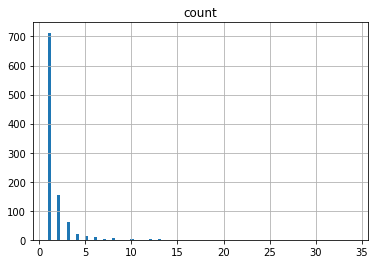

In [30]:
bigCompanies.hist(column='count', bins = 100)

## Analysis into Top Investors

In [33]:
investments_df = pd.read_csv("../raw/investments.csv", encoding = 'ISO-8859-1').dropna()

In [34]:
investments_df = investments_df[investments_df['funded_month'] >= '2007']

In [35]:
investments_df['raised_amount_usd'] = investments_df['raised_amount_usd'].apply(lambda x: x.replace(',', '').strip())
investments_df['raised_amount_usd'] = investments_df['raised_amount_usd'].astype(int)

In [36]:
test_df = investments_df.groupby(['investor_name', 'funded_year']).agg({'raised_amount_usd': 'sum'}).reset_index()

In [38]:
test_df = test_df.groupby(['funded_year', 'investor_name']).agg({'raised_amount_usd': sum})

In [39]:
test_df = test_df['raised_amount_usd'].groupby('funded_year', group_keys = False).nlargest(10).to_frame()

In [40]:
test_df

raised_amount_usd
funded_year investor_name                               
2007        New Enterprise Associates         1074789000
            Sequoia Capital                    842679000
            Intel Capital                      554600000
            Goldman Sachs                      462300000
            Accel Partners                     448730000
...                                                  ...
2014        Fidelity Investments              1712000000
            Menlo Ventures                    1595500000
            Intel Capital                     1516469993
            Accel Partners                    1424925000
            Sequoia Capital                   1416430016

[80 rows x 1 columns]

In [41]:
test_df['year_rank'] = test_df.groupby('funded_year')['raised_amount_usd'].rank(ascending = False)

In [42]:
test_df.to_csv('../clean/investor_ranks.csv')